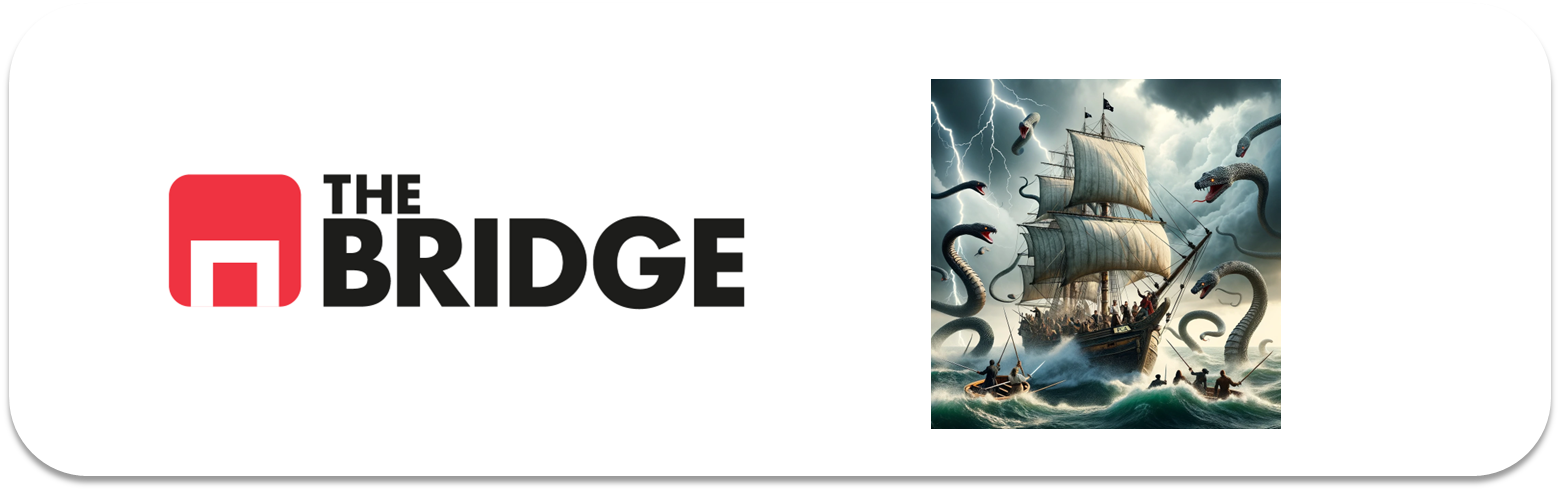

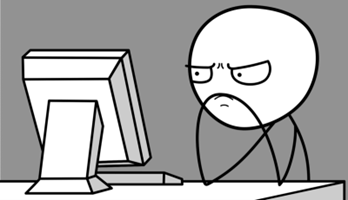

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:

# Carga el archivo CSV
df = pd.read_csv('data/nutrition.csv')

# Muestra las primeras filas
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
# Revisión general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [4]:
# Seleccionamos solo las columnas numéricas
df_num = df.select_dtypes(include='number')
# Calculamos la matriz de correlación
corr_matrix = df_num.corr()

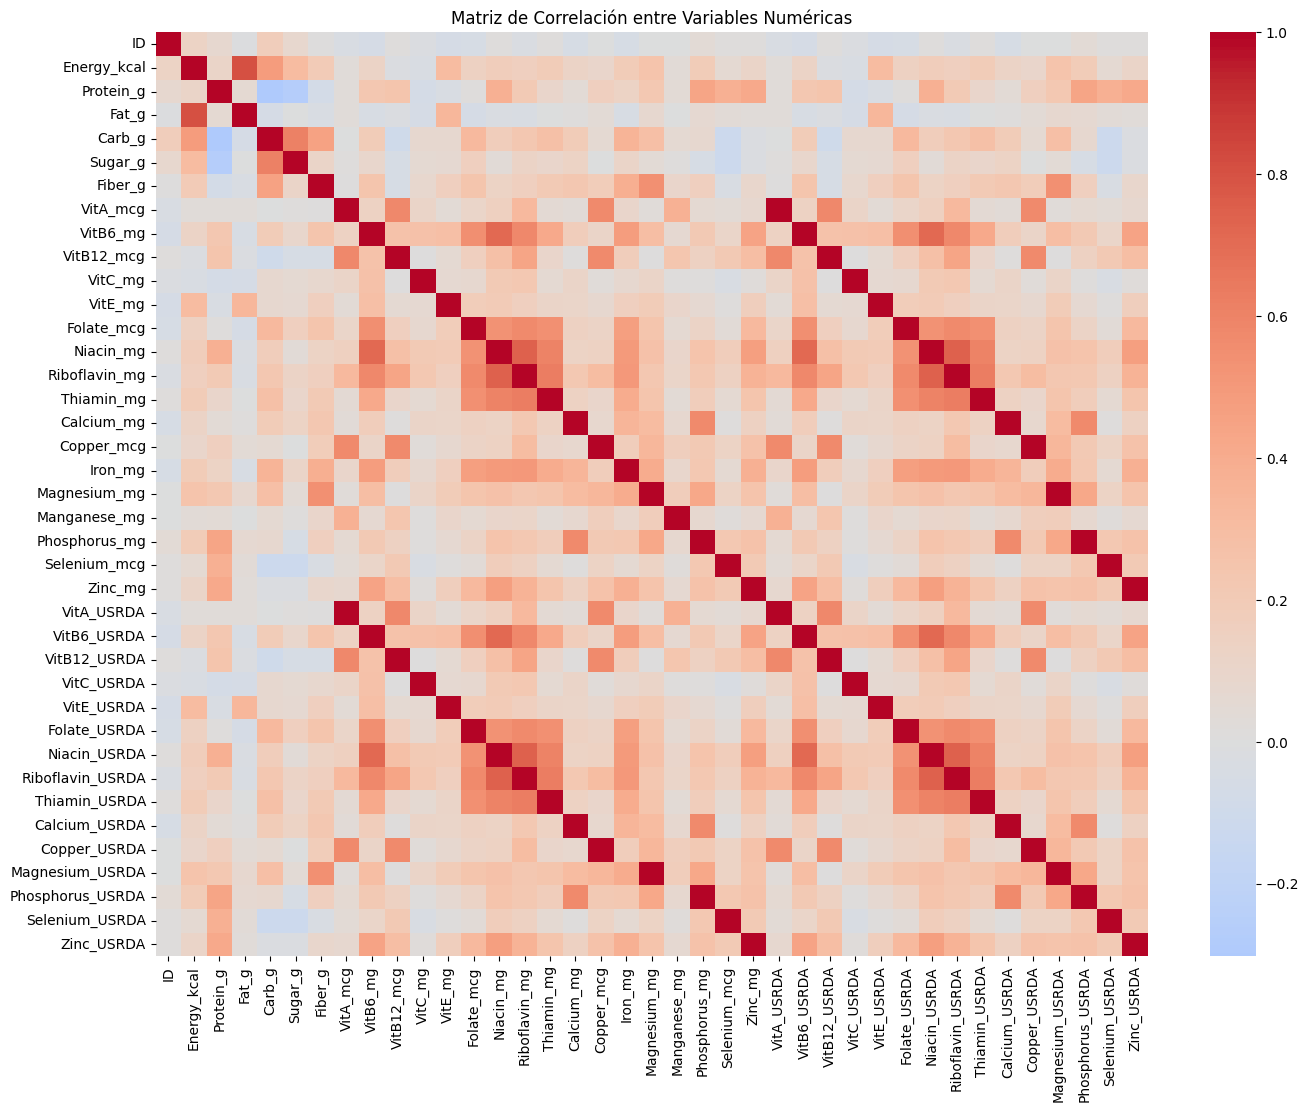

In [5]:
# Establecer el tamaño del gráfico
plt.figure(figsize=(16, 12))

# Mapa de calor
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)

plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [6]:
# Eliminamos las columnas que terminan en '_USRDA'
df_nopct = df_num.loc[:, ~df_num.columns.str.endswith('_USRDA')]

# También podemos eliminar 'ID', que no aporta información nutricional
df_nopct = df_nopct.drop(columns=['ID'])

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [7]:
# Eliminamos las columnas no numéricas
df_numerico = df.select_dtypes(exclude='object')

# Mostramos las primeras filas para verificar
df_numerico.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


In [8]:
df_numerico = df_numerico.drop(columns=['ID'])
# Variables con distribución sesgada
cols_log = ['Sugar_g', 'Fiber_g', 'VitB6_mg', 'Copper_mcg', 'Zinc_mg', 'Iron_mg', 'Selenium_mcg', 
            'VitB12_mcg', 'VitA_mcg']

# Aplicamos log(1 + x) para evitar log(0)
df_numerico[cols_log] = np.log1p(df_numerico[cols_log])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [10]:
df_scaled = pd.DataFrame(df_scaled, columns=df_numerico.columns)

# Mostramos las primeras filas estandarizadas
df_scaled.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,2.896234,-1.011747,4.441289,-0.798867,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.137643,...,-0.253584,-0.697012,-0.451809,-0.395218,-0.245398,-0.311347,-0.548385,-0.649918,-0.410557,-0.559918
1,2.896234,-1.011747,4.441289,-0.798867,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.137643,...,-0.253584,-0.697012,-0.451809,-0.395218,-0.245398,-0.282415,-0.548385,-0.654842,-0.410557,-0.571830
2,3.834956,-1.065776,5.599153,-0.801069,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.137643,...,-0.269666,-0.705080,-0.516275,-0.402935,-0.344726,-0.309539,-0.584057,-0.753325,-0.445904,-0.583742
3,0.747208,0.936124,1.140402,-0.715158,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.137643,...,-0.076688,-0.495535,0.321775,-0.348916,2.257682,-0.239017,-0.173821,1.137542,0.066632,0.205414
4,0.853478,1.110532,1.199651,-0.698637,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.137643,...,-0.162456,-0.681291,0.252864,-0.377855,2.982780,-0.267949,-0.155984,1.452687,0.066632,0.187546


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

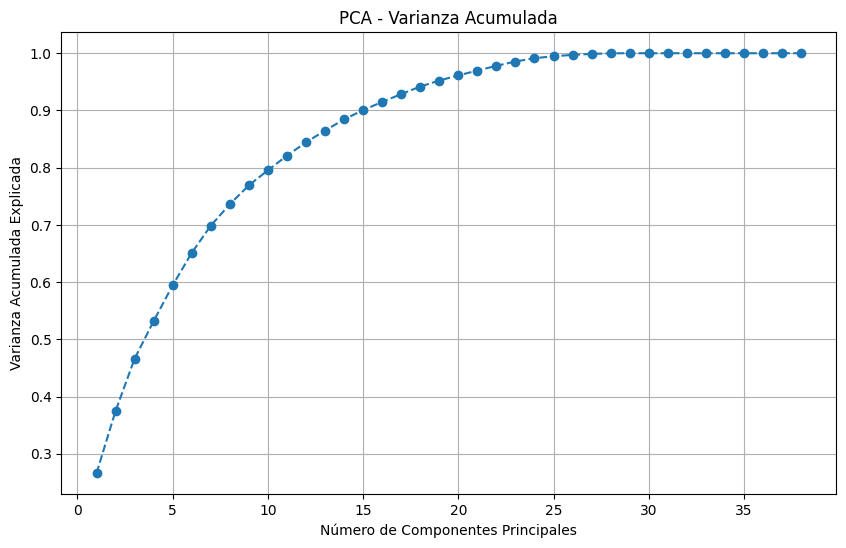

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Aplicar PCA con todos los componentes
pca = PCA()
pca.fit(df_scaled)

# Transformar los datos
df_pca = pca.transform(df_scaled)

# Convertimos a DataFrame para facilitar análisis si es necesario
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Mostrar varianza explicada por componente
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada)+1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('PCA - Varianza Acumulada')
plt.grid(True)
plt.show()

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [12]:

# Crear DataFrame con las cargas (loadings)
loadings = pd.DataFrame(
    pca.components_.T,  # transponer para que las filas sean las features
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_scaled.columns
)

# Mostrar las primeras filas
loadings.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
Energy_kcal,0.095,-0.114,0.170,-0.073,0.378,0.012,-0.056,0.434,0.268,-0.005,...,0.679,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
Protein_g,0.138,0.336,0.062,-0.147,0.022,-0.005,0.113,0.084,-0.023,0.057,...,-0.175,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000
Fat_g,0.014,-0.001,0.140,-0.029,0.442,0.152,-0.097,0.396,0.056,-0.074,...,-0.564,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
Carb_g,0.088,-0.332,0.081,-0.012,0.003,-0.177,0.016,0.119,0.359,0.069,...,-0.436,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000
Sugar_g,0.017,-0.312,0.011,0.049,-0.018,-0.070,-0.113,0.007,0.378,0.023,...,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
Fiber_g,0.080,-0.309,0.143,0.037,-0.018,-0.183,0.166,-0.105,0.090,0.022,...,0.022,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
VitA_mcg,0.072,-0.018,-0.036,0.213,-0.092,0.137,-0.219,-0.166,0.123,-0.429,...,0.003,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
VitB6_mg,0.243,0.034,-0.114,-0.079,0.001,0.082,0.101,-0.183,0.166,0.097,...,-0.009,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000
VitB12_mcg,0.167,0.297,-0.129,0.046,0.023,0.044,-0.118,-0.038,0.204,0.092,...,-0.002,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
VitC_mg,0.060,-0.114,-0.066,0.146,-0.218,0.445,0.332,0.206,0.043,-0.054,...,0.002,-0.116,-0.356,0.168,0.214,-0.106,-0.080,-0.298,-0.204,-0.372


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

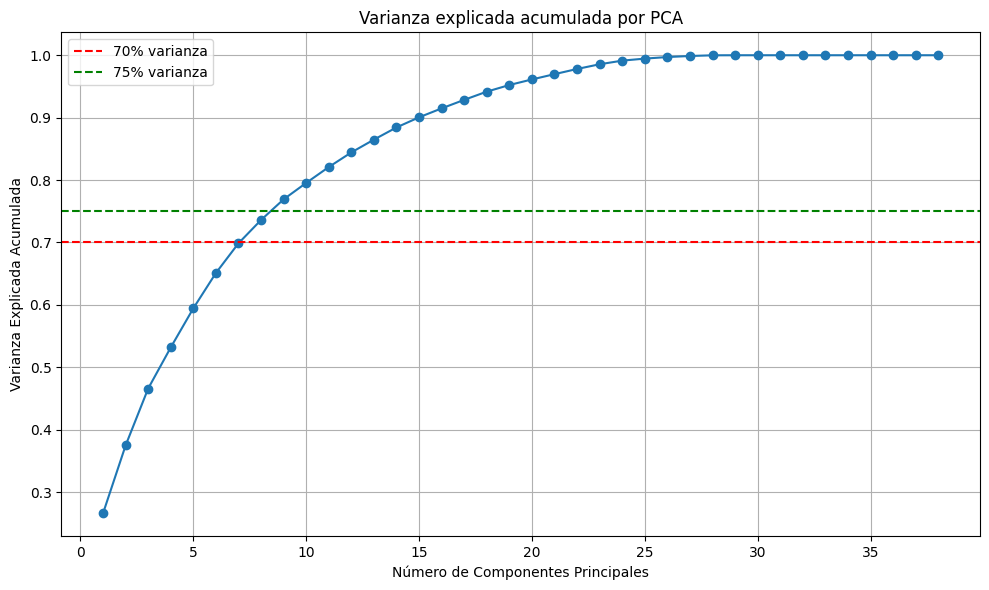

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular la varianza explicada acumulada
var_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--', label='70% varianza')
plt.axhline(y=0.75, color='g', linestyle='--', label='75% varianza')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Buscar el número mínimo de componentes necesarios para 70-75%
n_70 = np.argmax(var_acumulada >= 0.70) + 1
n_75 = np.argmax(var_acumulada >= 0.75) + 1

print(f"Número de componentes para >=70% varianza: {n_70}")
print(f"Número de componentes para >=75% varianza: {n_75}")

Número de componentes para >=70% varianza: 8
Número de componentes para >=75% varianza: 9


### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.